## Association Rule


## Import required Libraries

In [4]:
import mlxtend

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

## Import Dataset 

In [6]:
retail_data = pd.read_excel('Online retail.xlsx')
retail_data

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


> Renaming a column to a proper name 

In [7]:
retail_data = retail_data.rename(columns={'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil':'Products'})

In [8]:
retail_data

,Products
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [9]:
retail_data.dtypes

Products    object
dtype: object

In [10]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [11]:
retail_data.shape

(7500, 1)

In [12]:
retail_data.iloc[[0]]

,Products
0,"burgers,meatballs,eggs"


> We convert each comma separated products into a list form using a custom function

In [13]:
def text_split(txt):
    return txt.split(',')

In [14]:
retail_data.head(3)

,Products
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"


In [15]:
data = retail_data['Products'].apply(text_split)
data

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: Products, Length: 7500, dtype: object

## Apriori Algorithm
> Apriori algorithm uses frequent itemsets to get association rules

## Preparing Data 
> Before proceeding to apriori algorithm, we have to convert and prepare the the data into sparse matrix with the help of TransactionEncoder module is mlxtend library. Later on we will encode these with to 0s and 1s to apply apriori algorithm.

In [16]:
from mlxtend.preprocessing import TransactionEncoder

In [17]:
te = TransactionEncoder()
encoded_data = te.fit_transform(data)

In [18]:
encoded_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [19]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [20]:
data = pd.DataFrame(encoded_data, columns=te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


> Now we will encode these results given by tranaction encoder from True to 1s and False to 0s, for providing input to apriori algorithm

In [21]:
## Replacing True to 1s and False to 0s
data.replace([True,False],[1,0],inplace=True)

In [22]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> The data is ready to provide for apriori algorithm to generate the possible itemset 

In [23]:
data.shape

(7500, 120)

In [35]:
frequent_itemsets = apriori(data, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033200,(avocado)
1,0.033733,(brownies)
2,0.087200,(burgers)
3,0.030133,(butter)
4,0.081067,(cake)
5,0.046800,(champagne)
6,0.060000,(chicken)
7,0.163867,(chocolate)
8,0.080400,(cookies)
9,0.051067,(cooking oil)


> **Key Insights :** Now we got the 53 frequent itemsets with the support score. We will now generate the association rule

## Generate Association Rule

In [36]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(chocolate),0.179733,0.163867,0.033200,0.184718,1.127246,0.003748,1.025576,0.137617
1,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681,0.135005
2,(french fries),(chocolate),0.170933,0.163867,0.034400,0.201248,1.228121,0.006390,1.046800,0.224044
3,(chocolate),(french fries),0.163867,0.170933,0.034400,0.209927,1.228121,0.006390,1.049354,0.222151
4,(milk),(chocolate),0.129600,0.163867,0.032133,0.247942,1.513074,0.010896,1.111794,0.389584
5,(chocolate),(milk),0.163867,0.129600,0.032133,0.196094,1.513074,0.010896,1.082714,0.405550
6,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
7,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
8,(spaghetti),(chocolate),0.174133,0.163867,0.039200,0.225115,1.373768,0.010665,1.079042,0.329442
9,(chocolate),(spaghetti),0.163867,0.174133,0.039200,0.239219,1.373768,0.010665,1.085551,0.325397


In [46]:
## Checking the highest lift ratio
rules_sorted = rules.sort_values(by='lift', ascending=False)
print(rules_sorted[['antecedents', 'consequents', 'lift']].head())

            antecedents      consequents      lift
27        (ground beef)      (spaghetti)  2.290857
26          (spaghetti)    (ground beef)  2.290857
25      (mineral water)    (ground beef)  1.748266
24        (ground beef)  (mineral water)  1.748266
21  (frozen vegetables)  (mineral water)  1.573133


> **Key Insights :** After sorting the lift score, we can see the highest lift score for product ground beef and spaghetti is having higher lift score, after that mineral water and ground beef also have good lift score. We can also visualise the top purchased items frequency.

## Visualize Top Items by Frequency

In [37]:
## We can visualise the Top Items by frequency
item_count = data.sum().sort_values(ascending=False)

In [38]:
item_count

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1229
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

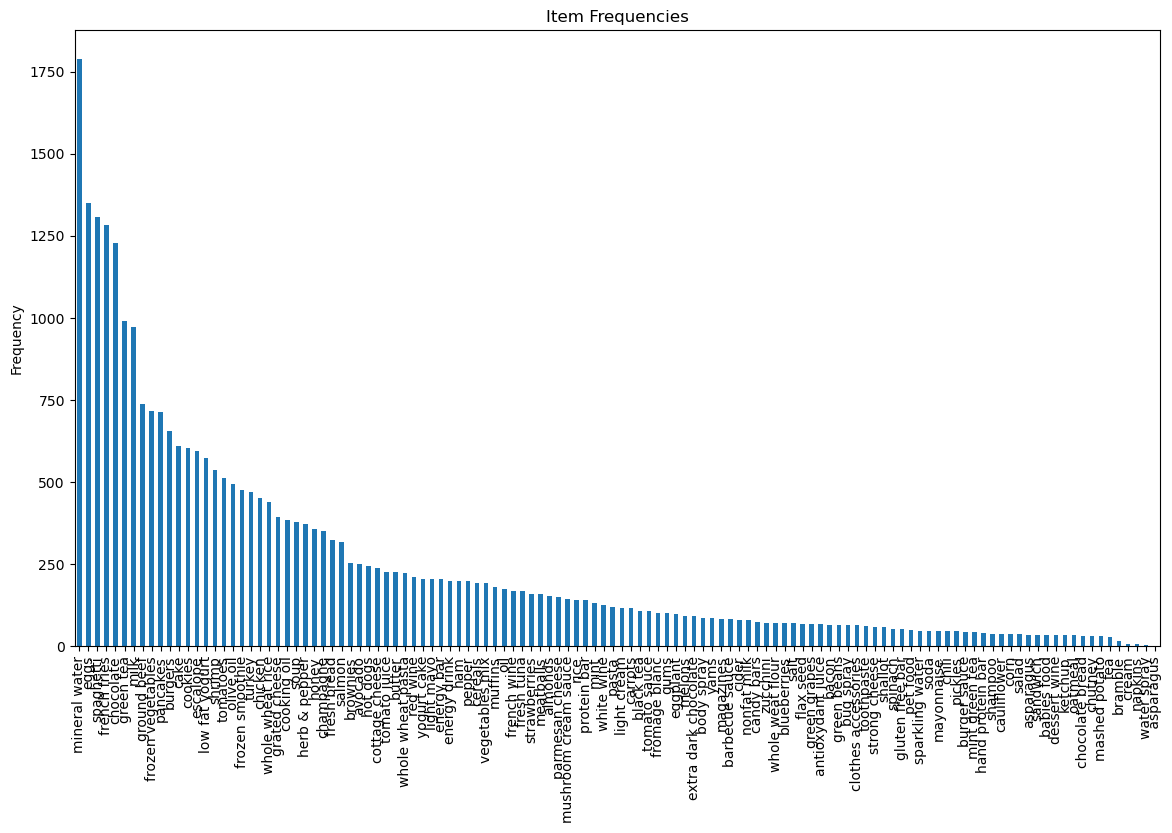

In [43]:
# Plot
plt.figure(figsize=(14,8))
item_count.plot(kind='bar', title='Item Frequencies')
plt.ylabel("Frequency")
plt.show()


> **Key Insights :** Here we can see the mineral water, egg, spaghetti, French Fries, chocolates are frequnetly purchased top products by the customers.

## Observations :
> **Key Insights :**
1. We can infer that the products ground beef and spaghetti is having higher lift score, after that mineral water and ground beef also have good lift score.
2. From visualization we can also find that the mineral water, egg, spaghetti, French Fries, chocolates are frequnetly purchased top products by the customers.
3. The products with high lift scores, (ground beef <-> spaghetti) and (mineral water <-> ground beef) creates strong association together

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px">Interview Questions :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### 1.	What is lift and why is it important in Association rules?

=> Lift measures how much more likely two items occur together than if they were independent.
A lift value greater than 1 indicates a positive association.
It’s important because it helps identify truly meaningful item relationships rather than those occurring by chance.
* Helps filter out misleading rules. some item combinations occur frequently simply because each item is popular. Lift removes this bias.
* Lift indicates whether items co-occur more than random chance.
* Useful for making better business decisions, like Market Basket Analysis, Cross-Selling, Product placement.
* Lift adjusts for popularity and reveals meaningful associations
    
#### 2.	What is support and Confidence. How do you calculate them?
=> Support shows how frequent an itemset is, while confidence shows how strong the rule A → B is. Support(A,B) ÷ Support(A) gives the confidence.

#### => Support : 
Support measures how frequently an item or itemset appears in the dataset.
It tells you how popular an item or item combination is.

Formula : 

For an itemset A:
Support(𝐴) = (Number of transactions containing A) / (Total number of transactions)

#### Confidence :
Confidence measures how often items in B appear in transactions that contain A.
It indicates the strength or reliability of the rule A → B.

Formula : 

Confidence(𝐴→𝐵) = Support(𝐴,𝐵) / Support(𝐴)

#### 3.	What are some limitations or challenges of Association rules mining?
    
=> Association rule mining suffers from generating too many rules, many of which are irrelevant. It is computationally expensive, struggles with sparse/high-dimensional data, cannot handle continuous variables without discretization, and support/confidence can be misleading. It also ignores sequence, time, and causality.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">